In [2]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Keras models from TensorFlow
from tensorflow.keras.applications import DenseNet121, ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Fixed Import

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from PIL import Image

# Install and import splitfolders
!pip install split-folders
import splitfolders



[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install tensorflow-addons



[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [4]:
train_aug = '/kaggle/input/rice-leaf-diseases-detection/Rice_Leaf_AUG/Rice_Leaf_AUG'

In [5]:
print(f'The No of Sub-directories {len(os.listdir(train_aug))} ')
print()
images = 0
for dir in os.listdir(train_aug):
    subdir_path = os.path.join(train_aug, dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The No of Images inside the Sub-directory {dir}: {num_files}')
        images += num_files 
print()
print(f'Totol No of Images {images}')

The No of Sub-directories 9 

The No of Images inside the Sub-directory Neck_Blast: 1000
The No of Images inside the Sub-directory Leaf scald: 1332
The No of Images inside the Sub-directory Sheath Blight: 1629
The No of Images inside the Sub-directory Healthy Rice Leaf: 1085
The No of Images inside the Sub-directory Narrow Brown Leaf Spot: 954
The No of Images inside the Sub-directory Leaf Blast: 1748
The No of Images inside the Sub-directory Rice Hispa: 1299
The No of Images inside the Sub-directory Brown Spot: 1546
The No of Images inside the Sub-directory Bacterial Leaf Blight: 1197

Totol No of Images 11790


In [6]:
print(f'The No of Sub-directories {len(os.listdir(train_aug))} ')
print()
images_train_aug = 0
for dir in os.listdir(train_aug):
    subdir_path = os.path.join(train_aug, dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The No of Images percentage inside the Sub-directory {dir}: {(num_files / images) * 100 }')
        images_train_aug += num_files 
print()
print(f'Totol No of Images {images_train_aug}')

The No of Sub-directories 9 

The No of Images percentage inside the Sub-directory Neck_Blast: 8.481764206955047
The No of Images percentage inside the Sub-directory Leaf scald: 11.297709923664122
The No of Images percentage inside the Sub-directory Sheath Blight: 13.816793893129772
The No of Images percentage inside the Sub-directory Healthy Rice Leaf: 9.202714164546226
The No of Images percentage inside the Sub-directory Narrow Brown Leaf Spot: 8.091603053435115
The No of Images percentage inside the Sub-directory Leaf Blast: 14.826123833757421
The No of Images percentage inside the Sub-directory Rice Hispa: 11.017811704834605
The No of Images percentage inside the Sub-directory Brown Spot: 13.112807463952503
The No of Images percentage inside the Sub-directory Bacterial Leaf Blight: 10.15267175572519

Totol No of Images 11790


The No of Sub-directories 9 

The No of Images percentage inside the Sub-directory Neck_Blast: 8.481764206955047
The No of Images percentage inside the Sub-directory Leaf scald: 11.297709923664122
The No of Images percentage inside the Sub-directory Sheath Blight: 13.816793893129772
The No of Images percentage inside the Sub-directory Healthy Rice Leaf: 9.202714164546226
The No of Images percentage inside the Sub-directory Narrow Brown Leaf Spot: 8.091603053435115
The No of Images percentage inside the Sub-directory Leaf Blast: 14.826123833757421
The No of Images percentage inside the Sub-directory Rice Hispa: 11.017811704834605
The No of Images percentage inside the Sub-directory Brown Spot: 13.112807463952503
The No of Images percentage inside the Sub-directory Bacterial Leaf Blight: 10.15267175572519

Total No of Images 11790



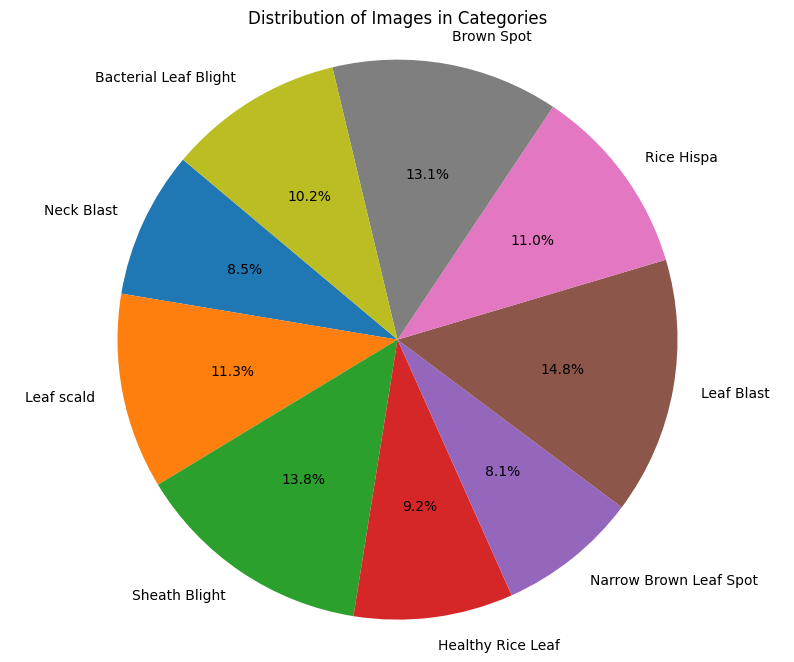

In [7]:
print(f'The No of Sub-directories {len(os.listdir(train_aug))} ')
print()

images = 0
categories = []
percentages = []

for dir in os.listdir(train_aug):
    subdir_path = os.path.join(train_aug, dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        category_name = dir.replace('_', ' ')  # Optional: Replace underscores with spaces for better display
        categories.append(category_name)
        percentages.append((num_files / 11790) * 100)
        print(f'The No of Images percentage inside the Sub-directory {dir}: {(num_files / images_train_aug) * 100 }')
        images += num_files 

print()
print(f'Total No of Images {images}')

# Plotting the data
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Images in Categories')
print()
plt.show()

In [8]:
input_folder = train_aug
train_dir = '/kaggle/working/train'
test_dir = '/kaggle/working/test'
val_dir = '/kaggle/working/val'

In [9]:
splitfolders.ratio(input_folder, output=train_dir, seed=42, ratio=(0.7, 0.20, 0.10))

Copying files: 11790 files [00:40, 289.67 files/s]


In [10]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_ds = train_datagen.flow_from_directory(train_dir + '/train', 
    class_mode='categorical',
    batch_size = 32, 
    target_size = (256, 256),
                                            )

test_ds = test_datagen.flow_from_directory(train_dir + '/test', 
    class_mode='categorical',
    batch_size = 32, 
    target_size = (256, 256),shuffle=False)

val_ds = val_datagen.flow_from_directory(train_dir + '/val', 
    class_mode='categorical',
    batch_size = 32, 
    target_size = (256, 256),
    shuffle = False
                                        )

Found 8249 images belonging to 9 classes.
Found 1187 images belonging to 9 classes.
Found 2354 images belonging to 9 classes.


In [12]:
import os
from tensorflow.keras.applications import DenseNet121

model_path = os.path.expanduser('~/.keras/models/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5')
if os.path.exists(model_path):
    os.remove(model_path)  # Delete corrupted file

conv_l = DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


29084464/29084464 [==============================] - 1s 0us/step


In [13]:
conv_l.trainable = False

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization

In [15]:
model = Sequential()

In [16]:
model = Sequential([
    conv_l,  # ✅ Adding DenseNet121 as the base model
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(9, activation='softmax')
])


In [17]:
images_train = 0
for dir in os.listdir(train_dir  + '/train'):
    subdir_path = os.path.join(train_dir + '/train', dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The No of Images inside the Sub-directory {dir}: {num_files}')
        images_train += num_files 
        
print()
print(images_train)

The No of Images inside the Sub-directory Leaf Blast: 1223
The No of Images inside the Sub-directory Narrow Brown Leaf Spot: 667
The No of Images inside the Sub-directory Rice Hispa: 909
The No of Images inside the Sub-directory Sheath Blight: 1140
The No of Images inside the Sub-directory Neck_Blast: 700
The No of Images inside the Sub-directory Brown Spot: 1082
The No of Images inside the Sub-directory Bacterial Leaf Blight: 837
The No of Images inside the Sub-directory Healthy Rice Leaf: 759
The No of Images inside the Sub-directory Leaf scald: 932

8249


In [18]:
images_test = 0
for dir in os.listdir(train_dir  + '/test'):
    subdir_path = os.path.join(train_dir  + '/test', dir)
    
    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The No of Images inside the Sub-directory {dir}: {num_files}')
        images_test += num_files 
print()
print(images_test)

The No of Images inside the Sub-directory Leaf Blast: 176
The No of Images inside the Sub-directory Narrow Brown Leaf Spot: 97
The No of Images inside the Sub-directory Rice Hispa: 131
The No of Images inside the Sub-directory Sheath Blight: 164
The No of Images inside the Sub-directory Neck_Blast: 100
The No of Images inside the Sub-directory Brown Spot: 155
The No of Images inside the Sub-directory Bacterial Leaf Blight: 121
The No of Images inside the Sub-directory Healthy Rice Leaf: 109
The No of Images inside the Sub-directory Leaf scald: 134

1187


In [19]:
import tensorflow_addons as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


# Define batch size and total number of training and testing samples
batch_size = 32
# total_train_samples = images_train # 11790 images
# total_test_samples = images_test # 2361 images

# Define the initial learning rate
initial_lr = 0.001

# Define the learning rate scheduler (Cyclical Learning Rate)
# clr = tfa.optimizers.CyclicalLearningRate(
#     initial_learning_rate=initial_lr,
#     maximal_learning_rate= 10 * initial_lr,
#     step_size= 2 * total_train_samples // batch_size,  # Total cycles = 2
#     scale_mode="cycle",
#     scale_fn=lambda x: 1 / (2.0 ** (x - 1))
# )

# Compile the model with the Adam optimizer and Cyclical Learning Rate
opt = Adam()
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with the learning rate scheduler and early stopping
history = model.fit(
    train_ds,
    epochs=50,
    validation_data=test_ds,
#     steps_per_epoch=total_train_samples // batch_size,  
#     validation_steps=total_test_samples // batch_size,  
#     callbacks=[early_stopping]
)

Epoch 1/50
258/258 [==============================] - 334s 1s/step - loss: 1.1836 - accuracy: 0.6212 - val_loss: 0.6276 - val_accuracy: 0.7869
Epoch 2/50
258/258 [==============================] - 326s 1s/step - loss: 0.7472 - accuracy: 0.7375 - val_loss: 0.5110 - val_accuracy: 0.8281
Epoch 3/50
258/258 [==============================] - 334s 1s/step - loss: 0.6330 - accuracy: 0.7774 - val_loss: 0.4065 - val_accuracy: 0.8610
Epoch 4/50
258/258 [==============================] - 310s 1s/step - loss: 0.5631 - accuracy: 0.8025 - val_loss: 0.4013 - val_accuracy: 0.8627
Epoch 5/50
258/258 [==============================] - 316s 1s/step - loss: 0.5268 - accuracy: 0.8145 - val_loss: 0.3641 - val_accuracy: 0.8821
Epoch 6/50
258/258 [==============================] - 319s 1s/step - loss: 0.4680 - accuracy: 0.8390 - val_loss: 0.3399 - val_accuracy: 0.8812
Epoch 7/50
258/258 [==============================] - 321s 1s/step - loss: 0.4453 - accuracy: 0.8440 - val_loss: 0.2678 - val_accuracy: 0.9065

/usr/local/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


38/38 [==============================] - 63s 2s/step


<Figure size 800x600 with 0 Axes>

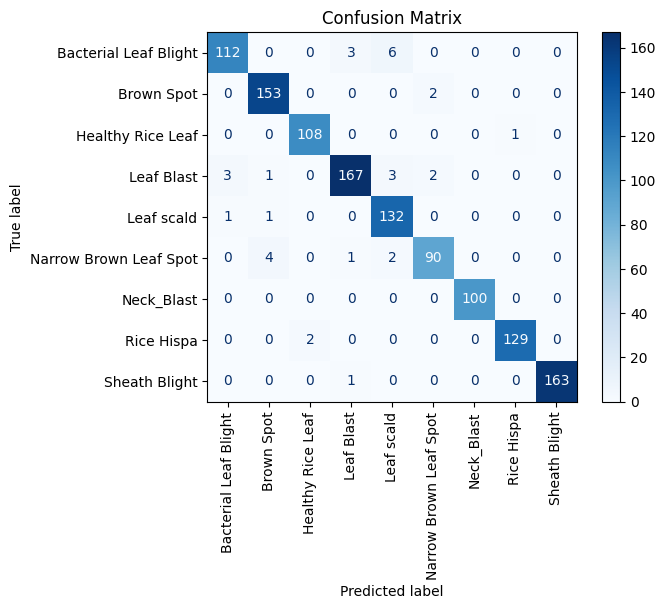

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels from the 'test_ds' directory iterator
true_labels = test_ds.labels

# Assuming 'model' is already trained
pred_probs = model.predict(test_ds)
pred_labels = np.argmax(pred_probs, axis=1)
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Display the confusion matrix
class_labels = list(test_ds.class_indices.keys())  # Get class labels from the generator
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.title('Confusion Matrix')
plt.show()

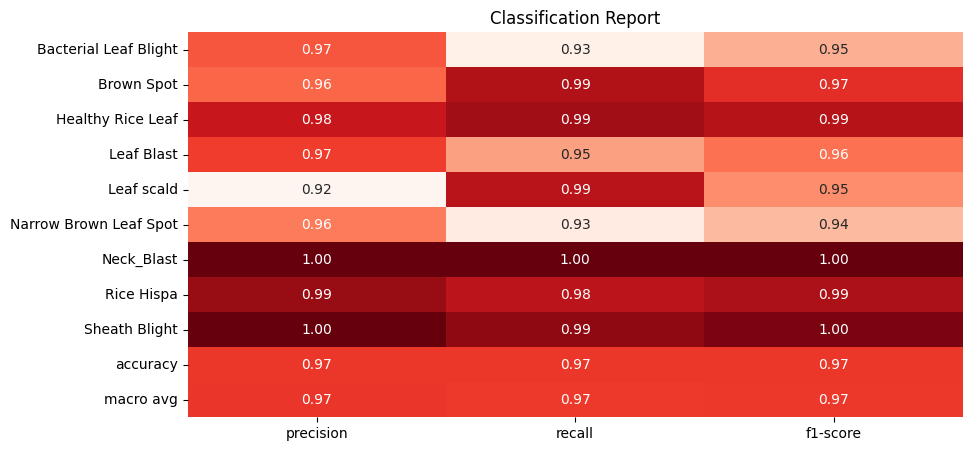

In [29]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true_labels1 and pred_labels1 from your CNN model

# Generate a classification report
report = classification_report(true_labels, pred_labels, target_names=class_labels, output_dict=True)

# Convert the report to a DataFrame for better visualization
import pandas as pd
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap=plt.cm.Reds,fmt=".2f", cbar=False)
plt.title('Classification Report')
plt.show()

In [30]:
model.save('my_model.h5')

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
import os
print(os.listdir("/kaggle/working/"))


['my_model.h5', 'train', '.virtual_documents']


In [32]:
from IPython.display import FileLink
FileLink("/kaggle/working/my_model.h5")


/kaggle/working/my_model.h5

In [33]:
from IPython.display import FileLink
FileLink('/kaggle/working/my_model.h5')


/kaggle/working/my_model.h5

In [34]:
import os
print(os.listdir("/kaggle/working/"))


['my_model.h5', 'train', '.virtual_documents']


In [35]:
from skimage import io
import tensorflow as tf

/usr/bin/sh: 1: zip: not found


In [38]:
model.save('/kaggle/working/my_model6.h5')


In [39]:
import os
print(os.listdir("/kaggle/working/"))

['my_model.h5', 'my_model.tar', 'train', 'my_model6.h5', '.virtual_documents']


In [43]:
from skimage import io
import tensorflow as tf


In [41]:
pip install scikit-image


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 50.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 28.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
values = val_ds.class_indices.keys()
keys = [0,1,2,4,5,6,7,8]

In [47]:
Output_dict = dict(zip(keys,values))

In [48]:
Output_dict

{0: 'Bacterial Leaf Blight',
 1: 'Brown Spot',
 2: 'Healthy Rice Leaf',
 4: 'Leaf Blast',
 5: 'Leaf scald',
 6: 'Narrow Brown Leaf Spot',
 7: 'Neck_Blast',
 8: 'Rice Hispa'}

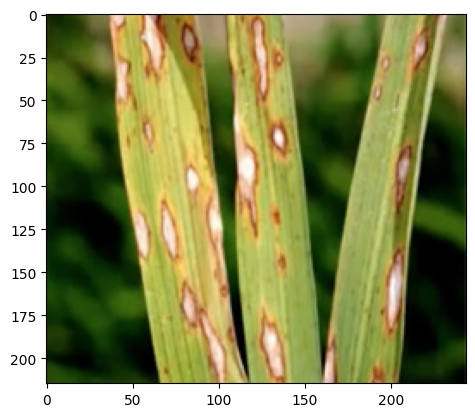

In [49]:
plt.imshow(io.imread('https://agritech.tnau.ac.in/crop_protection/images/rice_diseases/blast_1.jpg'))

In [50]:
from skimage import io, transform

image_array = io.imread('https://agritech.tnau.ac.in/crop_protection/images/rice_diseases/blast_1.jpg')

# Resize the image to match the expected input shape of your model
resized_image = transform.resize(image_array, (256, 256))

preprocessed_image = resized_image / 255.0

In [57]:
import tensorflow as tf
from skimage import io
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your image (replace with the actual path to the image)
input_image = io.imread('/kaggle/working/train/test/Brown Spot/Brown_spot (103).jpg')

# Resize the image to (256, 256) as expected by the model
input_image = tf.image.resize(input_image, (256, 256))

# Convert image to array (if not done already)
input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension

# Normalize the image if needed (depends on the model's preprocessing)
input_image = input_image / 255.0  # For models that use normalization

# Make the prediction
prediction = model.predict(input_image)

# Get the class with the highest probability
predicted_class_index = np.argmax(prediction)


/usr/local/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 0s 368ms/step


In [58]:
Output_dict[predicted_class_index]

'Brown Spot'

In [59]:
def predict_web_image(url):
    try:
        image_array = io.imread(url)

        # Resize the image to match the expected input shape of your model
        resized_image = transform.resize(image_array, (256, 256))

        preprocessed_image = resized_image / 255.0

        prediction = model.predict(np.expand_dims(preprocessed_image, axis=0))

        predicted_class_index = np.argmax(prediction)

        print(f"The predicted image has {Output_dict[predicted_class_index]} disease")

    except Exception as e:
        print(f"An error occurred: {e}")

# Assuming 'model' and 'Output_dict' are defined elsewhere in your code

        
    
def plot_web_image(url):
    plt.imshow(io.imread(url))

In [60]:
predict_web_image('https://1.bp.blogspot.com/-WXV-JPCBc-Y/X0EflszH76I/AAAAAAAABFo/bX1FtzzsgQcMHbyT6g4_VvdOa7mO8IssACLcBGAsYHQ/s640/RiceBlast1.webp')

/usr/local/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 0s 350ms/step
The predicted image has Leaf scald disease


In [61]:
model.save('my_final_model.h5')

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 357ms/step
Predicted Disease: Leaf Blast
Probabilities for all diseases:
Bacterial Leaf Blight: 0.0000
Brown Spot: 0.0000
Healthy Rice Leaf: 0.0000
Leaf Blast: 0.9949
Leaf scald: 0.0048
Narrow Brown Leaf Spot: 0.0003
Neck_Blast: 0.0000
Rice Hispa: 0.0000
Sheath Blight: 0.0000


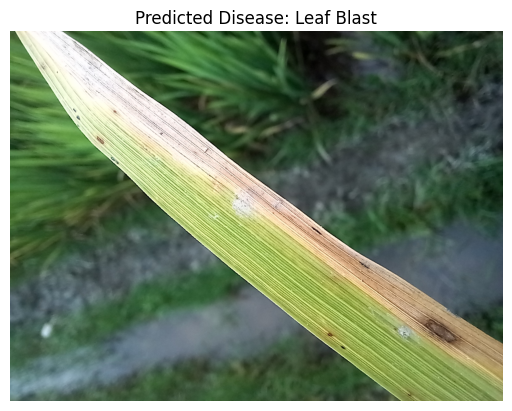

In [62]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from skimage import io, transform
import matplotlib.pyplot as plt
from PIL import Image

# Load the saved model
model = load_model('/kaggle/working/my_final_model.h5')

# Define the class labels
class_labels = list(val_ds.class_indices.keys())

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    image = Image.open(image_path)
    
    # Resize the image to match the input size of the model
    image = image.resize((256, 256))
    
    # Convert the image to a numpy array
    image_array = np.array(image)
    
    # Normalize the image
    preprocessed_image = image_array / 255.0
    
    # Expand dimensions to match the input shape of the model
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
    
    return preprocessed_image

# Function to predict the disease
def predict_disease(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Get the predictions
    predictions = model.predict(preprocessed_image)
    
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)
    
    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]
    
    # Get the probabilities for all classes
    probabilities = predictions[0]
    
    # Print the predicted disease and probabilities for all diseases
    print(f"Predicted Disease: {predicted_class_label}")
    print("Probabilities for all diseases:")
    for i, prob in enumerate(probabilities):
        print(f"{class_labels[i]}: {prob:.4f}")
    
    # Display the image
    plt.imshow(Image.open(image_path))
    plt.title(f"Predicted Disease: {predicted_class_label}")
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/kaggle/working/train/test/Leaf Blast/20231006_165851.jpg'  # Replace with the path to your local image
predict_disease(image_path)